In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
data=pd.read_csv('Company Stock and Investment.csv')

In [82]:
data

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-04,0.026830,0.001097,0.015565,-0.004609
2,2010-01-05,0.002699,0.001560,0.001729,0.005900
3,2010-01-06,0.021688,0.006009,-0.015906,-0.018116
4,2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-11-09,0.005984,0.000623,-0.002043,-0.003310
1980,2017-11-10,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [83]:
gold=data.copy()

In [84]:
gold.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1,inplace=True)

In [85]:
gold

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-01-04,0.001097
2,2010-01-05,0.001560
3,2010-01-06,0.006009
4,2010-01-07,0.000221
...,...,...
1979,2017-11-09,0.000623
1980,2017-11-10,-0.000389
1981,2017-11-13,-0.004944
1982,2017-11-14,-0.002621


In [86]:
gold.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [87]:
gold['Date']=pd.to_datetime(gold['Date'])

In [88]:
gold.set_index('Date',inplace=True)

In [89]:
gold

,Gold Investments
Date,
2009-12-31,0.000150
2010-01-04,0.001097
2010-01-05,0.001560
2010-01-06,0.006009
2010-01-07,0.000221
...,...
2017-11-09,0.000623
2017-11-10,-0.000389
2017-11-13,-0.004944


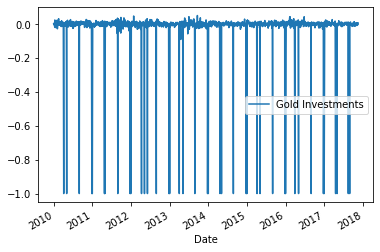

In [90]:
gold.plot()

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
test=adfuller(gold['Gold Investments'])

In [93]:
test

(-15.906853851669053,
 8.208405770368892e-29,
 7,
 1976,
 {'1%': -3.4336636717018405,
  '5%': -2.8630037919874423,
  '10%': -2.567549261922421},
 -2147.421096479902)

In [94]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [95]:
adfuller_test(gold['Gold Investments'])

ADF Test Statistic : -15.906853851669053
p-value : 8.208405770368892e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [96]:
#P <0.05, null hypothesis rejected - Data is stationary

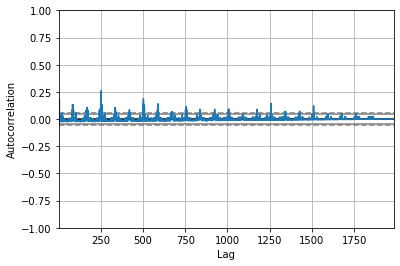

In [97]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(gold['Gold Investments'])
plt.show()

In [98]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

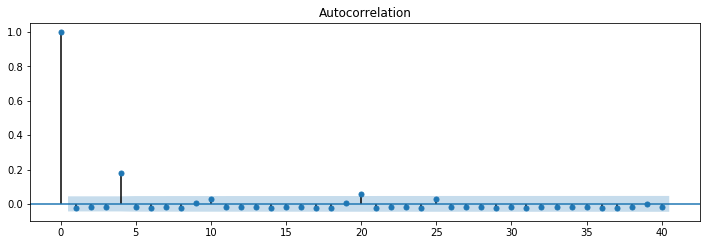

In [99]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gold['Gold Investments'].iloc[:],lags=40,ax=ax1)

In [100]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(gold['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [101]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1067.368
Method:                       css-mle   S.D. of innovations              0.141
Date:                Wed, 28 Oct 2020   AIC                          -2126.737
Time:                        09:42:02   BIC                          -2104.367
Sample:                             1   HQIC                         -2118.520
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.571e-06   8.43e-06     -0.186      0.852   -1.81e-05     1.5e-05
ar.L1.D.Gold Investments    -0.0213      0.022     -0.949      0.342      -0.065       0.023
ma.L1.D.Gold Investments    -0.9981      0.003   -321.156      0.000      -1.004      -0.992
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -46.9121           +0.0000j           46.9121            0.5000
MA.1            1.0019           +0.0000j            1.0019            0.0000
-----------------------------------------------------------------------------
"""

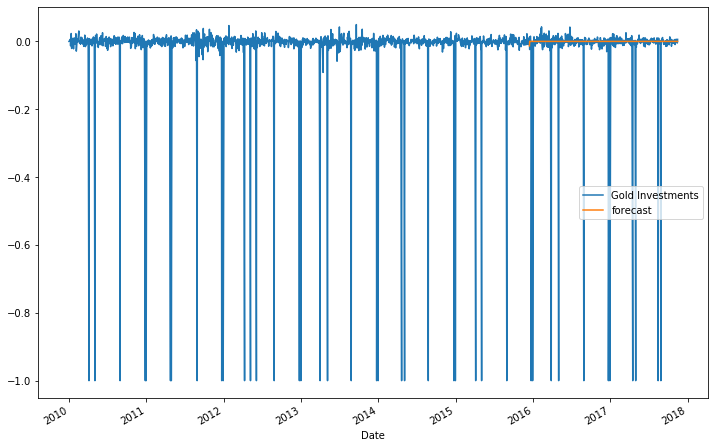

In [102]:
gold['forecast']=model_fit.predict(start=1500,end=1983,dynamic=True)
gold[['Gold Investments','forecast']].plot(figsize=(12,8))

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


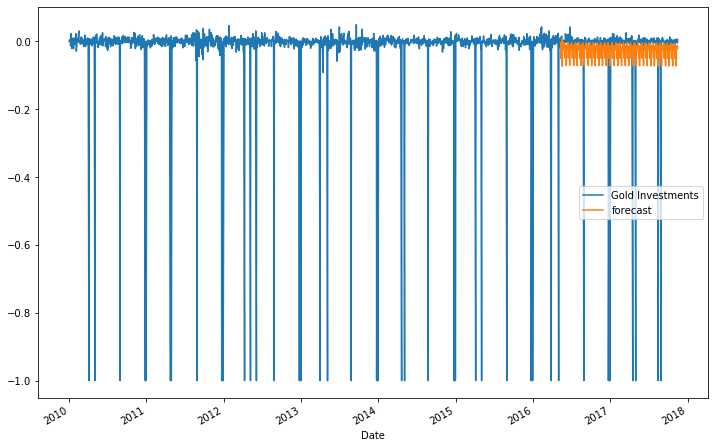

In [103]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(gold['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()
gold['forecast']=results.predict(start=1600,end=1983,dynamic=True)
gold[['Gold Investments','forecast']].plot(figsize=(12,8))

In [104]:
#Adding in dates for the purpose of forecasting
from pandas.tseries.offsets import DateOffset
future_dates=[gold.index[-1]+ DateOffset(days=x)for x in range(0,1143)]


In [105]:
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=gold.columns)

In [106]:
future_datest_data.tail()

,Gold Investments,forecast
2020-12-27,NaN,NaN
2020-12-28,NaN,NaN
2020-12-29,NaN,NaN
2020-12-30,NaN,NaN
2020-12-31,NaN,NaN


In [107]:
forecast_df=pd.concat([gold,future_datest_data])

In [108]:
forecast_df.shape

(3126, 2)

In [109]:
model=sm.tsa.statespace.SARIMAX(forecast_df['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


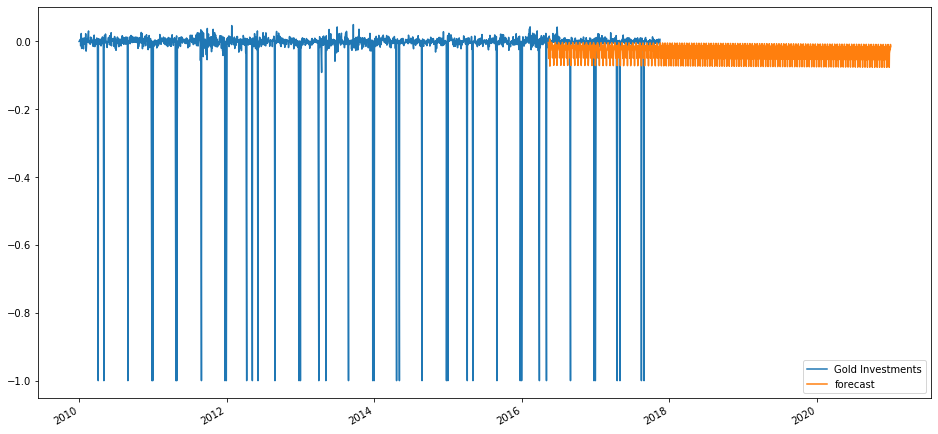

In [110]:
forecast_df['forecast']=results.predict(start=1600,end=3125,dynamic=True)
forecast_df[['Gold Investments','forecast']].plot(figsize=(16,8))

In [111]:
#SARIMAX works well in the predicting the value og gold shares

In [112]:
#Lets now work on the oil shares:


In [113]:
oil=data.copy()

In [114]:
oil

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-04,0.026830,0.001097,0.015565,-0.004609
2,2010-01-05,0.002699,0.001560,0.001729,0.005900
3,2010-01-06,0.021688,0.006009,-0.015906,-0.018116
4,2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-11-09,0.005984,0.000623,-0.002043,-0.003310
1980,2017-11-10,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [115]:
oil.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1,inplace=True)

In [116]:
oil['Date']=pd.to_datetime(oil['Date'])
oil.set_index('Date',inplace=True)

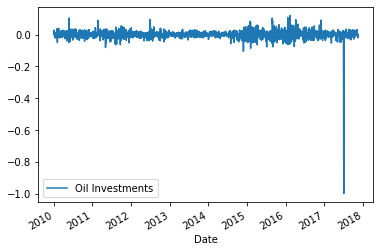

In [117]:
oil.plot()

In [118]:
test2=adfuller(oil['Oil Investments'])

In [119]:
adfuller_test(oil['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


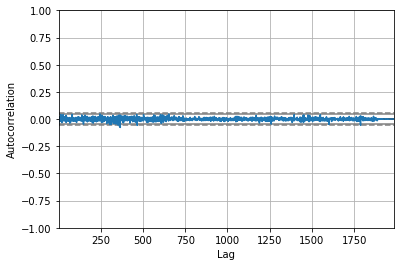

In [120]:
autocorrelation_plot(oil['Oil Investments'])
plt.show()

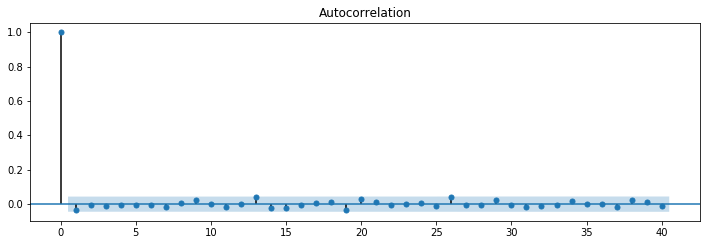

In [121]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(oil['Oil Investments'].iloc[:],lags=40,ax=ax1)

In [122]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(oil['Oil Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [123]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4081.134
Method:                       css-mle   S.D. of innovations              0.031
Date:                Wed, 28 Oct 2020   AIC                          -8154.269
Time:                        09:42:36   BIC                          -8131.899
Sample:                             1   HQIC                         -8146.052
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.559e-06   1.17e-06     -1.330      0.184   -3.86e-06    7.39e-07
ar.L1.D.Oil Investments    -0.0316      0.022     -1.408      0.159      -0.076       0.012
ma.L1.D.Oil Investments    -1.0000      0.001   -735.862      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.6384           +0.0000j           31.6384            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

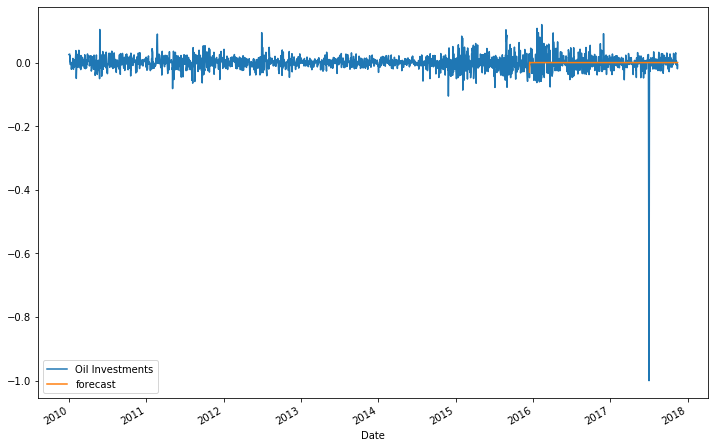

In [124]:
oil['forecast']=model_fit.predict(start=1500,end=1983,dynamic=True)
oil[['Oil Investments','forecast']].plot(figsize=(12,8))

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


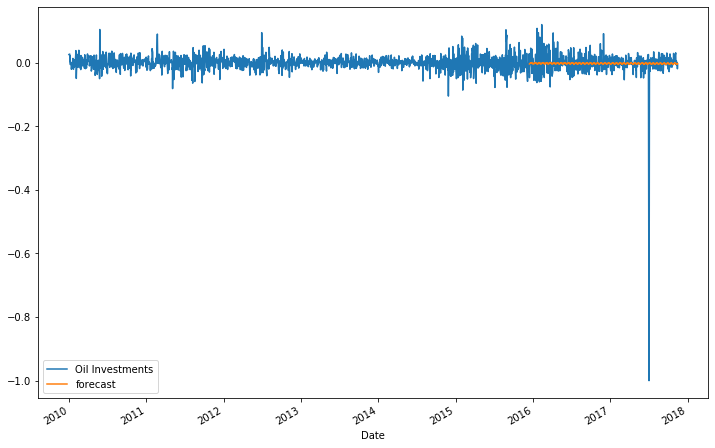

In [125]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(oil['Oil Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()
oil['forecast']=results.predict(start=1500,end=1983,dynamic=True)
oil[['Oil Investments','forecast']].plot(figsize=(12,8))

In [126]:
oil_forecast=pd.concat([oil,future_datest_data])

In [127]:
oil_forecast.shape

(3126, 3)

In [128]:
oil

,Oil Investments,forecast
Date,,
2009-12-31,0.025417,NaN
2010-01-04,0.026830,NaN
2010-01-05,0.002699,NaN
2010-01-06,0.021688,NaN
2010-01-07,-0.006256,NaN
...,...,...
2017-11-09,0.005984,-0.003745
2017-11-10,-0.007173,-0.004434
2017-11-13,0.000352,-0.005488


In [129]:
model=sm.tsa.statespace.SARIMAX(oil_forecast['Oil Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


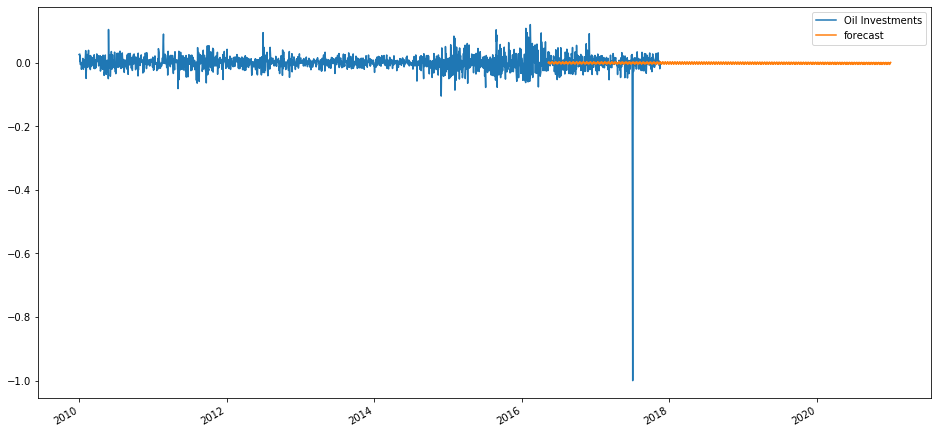

In [130]:
oil_forecast['forecast']=results.predict(start=1600,end=3125,dynamic=True)
oil_forecast[['Oil Investments','forecast']].plot(figsize=(16,8))

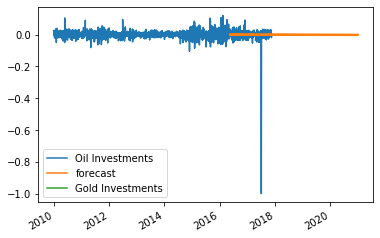

In [131]:
oil_forecast.plot()

In [132]:
#Now, lets try and work on the company shares

In [133]:
company=data.copy()
company.drop(['Oil Investments','Gold Investments','Other sharesInvestments'],axis=1,inplace=True)

In [134]:
company

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-01-04,0.015565
2,2010-01-05,0.001729
3,2010-01-06,-0.015906
4,2010-01-07,-0.001849
...,...,...
1979,2017-11-09,-0.002043
1980,2017-11-10,-0.006880
1981,2017-11-13,-0.004008
1982,2017-11-14,-0.015118


In [135]:
company['Date']=pd.to_datetime(company['Date'])
company.set_index('Date',inplace=True)

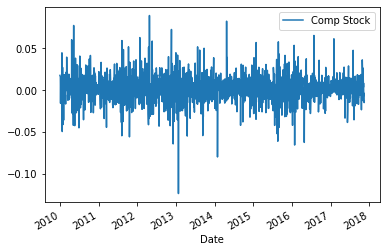

In [136]:
company.plot()

In [138]:
test3=adfuller(company['Comp Stock'])

In [139]:
test3

(-12.473386265908339,
 3.207774293088362e-23,
 12,
 1971,
 {'1%': -3.4336720887549483,
  '5%': -2.863007508094813,
  '10%': -2.567551240570721},
 -10649.854659769328)

In [147]:
adfuller_test(company['Comp Stock'])

ADF Test Statistic : -12.473386265908339
p-value : 3.207774293088362e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


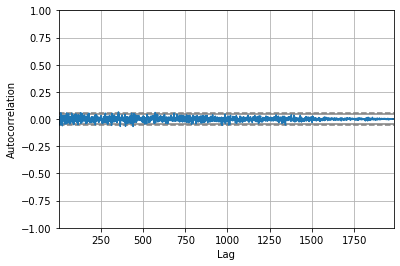

In [145]:
autocorrelation_plot(company['Comp Stock'])
plt.show()

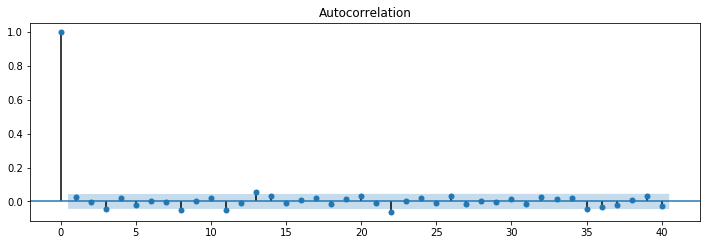

In [146]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(company['Comp Stock'].iloc[:],lags=40,ax=ax1)

In [148]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(company['Comp Stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [149]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5373.983
Method:                       css-mle   S.D. of innovations              0.016
Date:                Wed, 28 Oct 2020   AIC                         -10739.966
Time:                        12:49:41   BIC                         -10717.597
Sample:                             1   HQIC                        -10731.749
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.078e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.26e-05
ar.L1.D.Comp Stock     0.0284      0.023      1.217      0.224      -0.017       0.074
ma.L1.D.Comp Stock    -0.9831      0.013    -73.359      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           35.2597           +0.0000j           35.2597            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

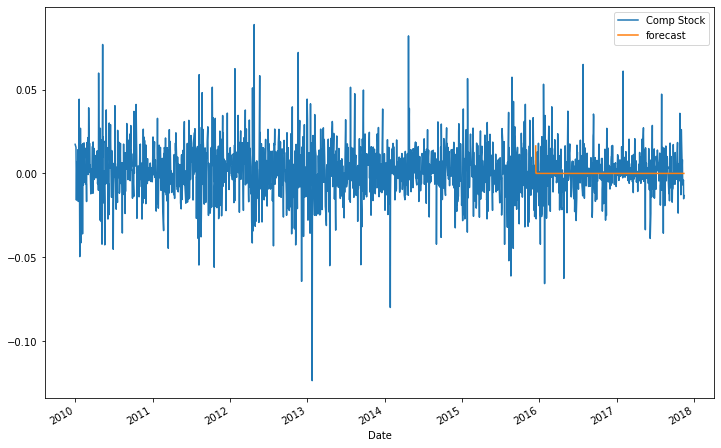

In [150]:
company['forecast']=model_fit.predict(start=1500,end=1983,dynamic=True)
company[['Comp Stock','forecast']].plot(figsize=(12,8))

In [152]:
model=sm.tsa.statespace.SARIMAX(company['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


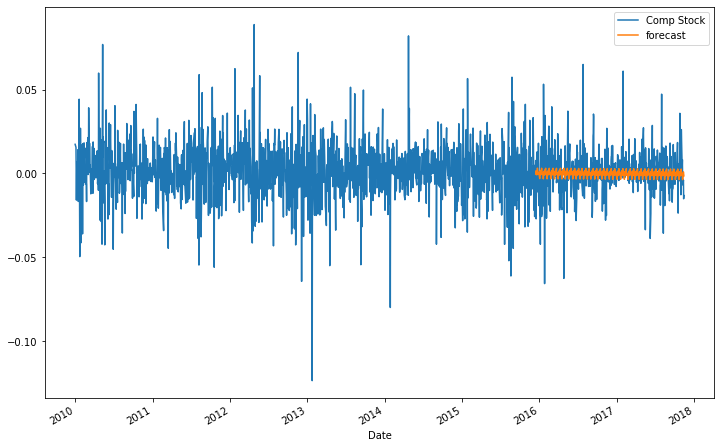

In [153]:
company['forecast']=results.predict(start=1500,end=1983,dynamic=True)
company[['Comp Stock','forecast']].plot(figsize=(12,8))

In [154]:
company_forecast=pd.concat([company,future_datest_data])

In [155]:
model=sm.tsa.statespace.SARIMAX(company_forecast['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\NSuresh\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


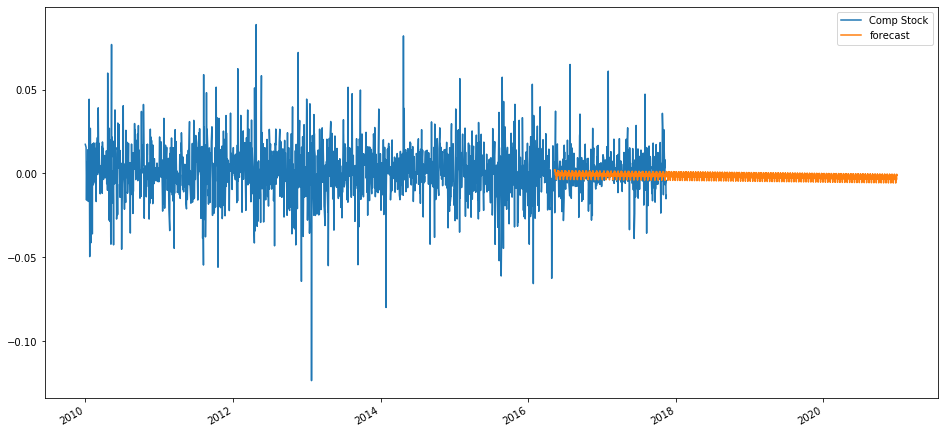

In [157]:
company_forecast['forecast']=results.predict(start=1600,end=3125,dynamic=True)
company_forecast[['Comp Stock','forecast']].plot(figsize=(16,8))

In [158]:
#SARIMAX model predicts the shares for the three features ( Oil, Gold and Company Stocks) 